In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [5]:
# 무작위 데이터 만들기
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

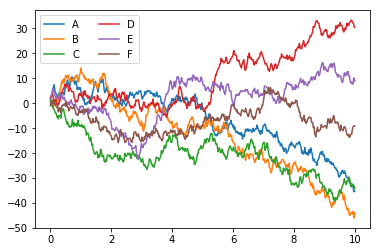

In [7]:
# matplotlib 로 그리기 - 투박하다 !
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

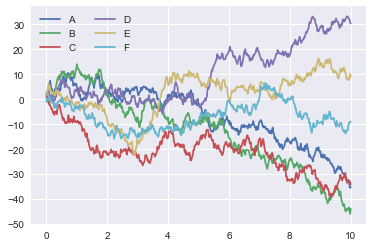

In [11]:
import seaborn as sns
sns.set() # seaborn style 적용

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [16]:
# histogram

data = np.random.multivariate_normal([0, 0], [[5, 2,], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

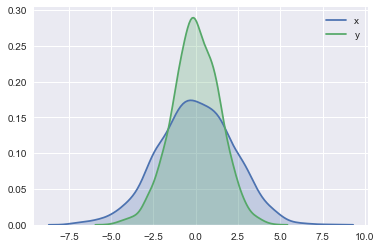

In [14]:
# Kernel density estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

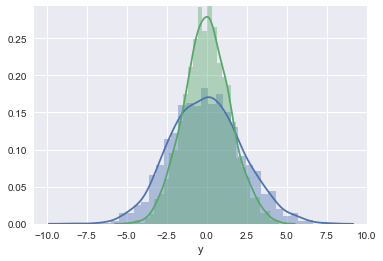

In [19]:
# distplot = KDE + histplot
sns.distplot(data['x'])
sns.distplot(data['y'])

c:\programdata\anaconda3\envs\tc\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


(-9.869091406121685, 9.146383005868888, -5.750724872261359, 5.505604730709739)

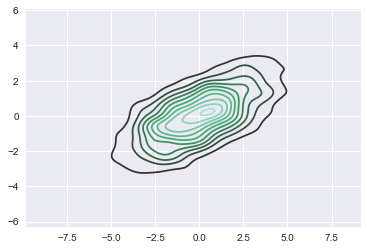

In [27]:
# 2D KDE
sns.kdeplot(data) # 전체 2dim dataset 를 kdeplot으로
plt.axis('equal')

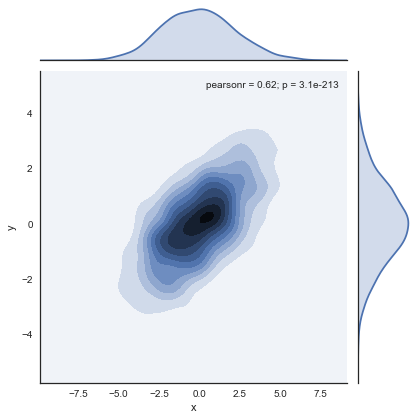

In [30]:
# jointplot으로 결합분포 + 각각분포 함꼐 볼 수 있다.
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde')


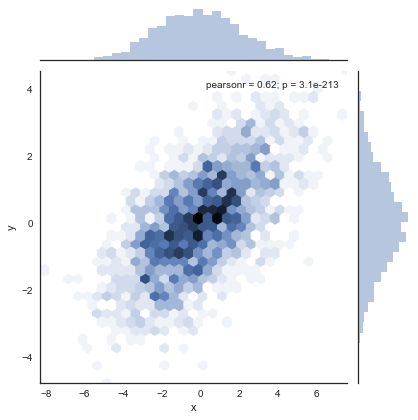

In [31]:
# 이런 것도 가능하다
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')


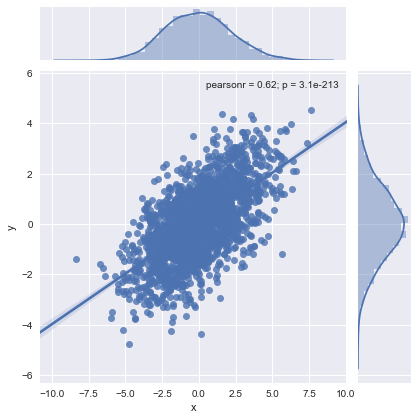

In [45]:
# 간단한 regression도 수행한다
sns.jointplot("x", "y", data, kind='reg')


In [33]:
# 큰 dim data는 pairplot을 이용한다
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


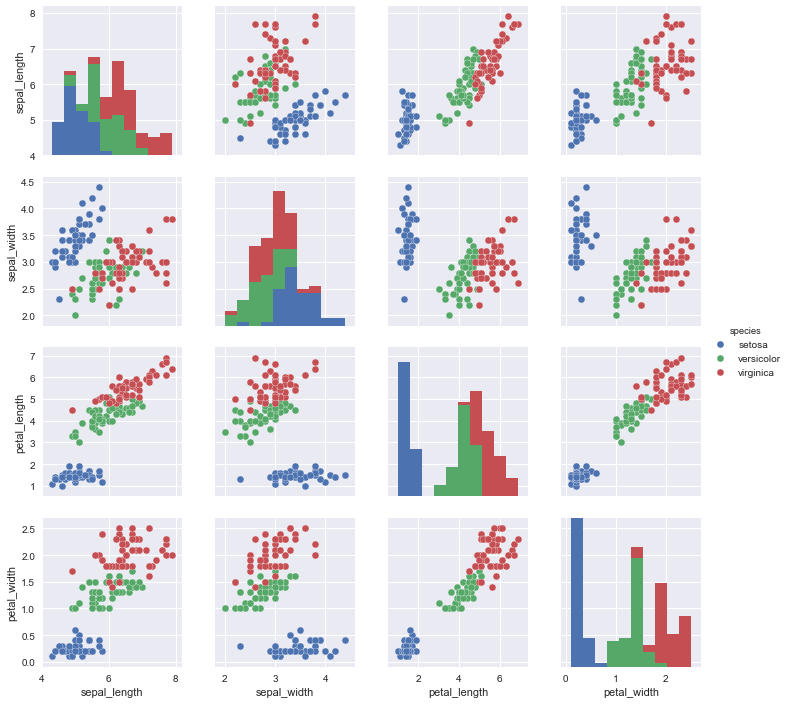

In [35]:
sns.pairplot(iris, hue='species', size=2.5)

In [36]:
# 부분집합들의 histogram 을 보는 법: FacetGrid
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


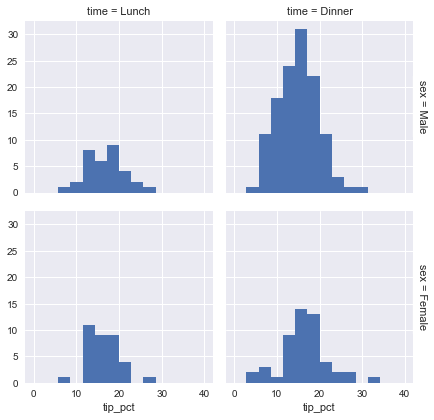

In [42]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True) # row="sex", col="time" 의 subplot grid 만들기
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15)) # 각 grid에 해당하는 "tip_pct" 데이터로 histogram 그리기

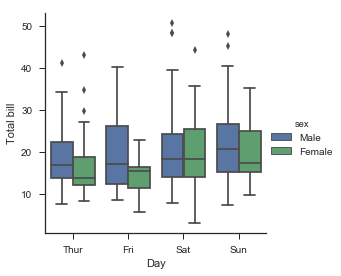

In [43]:
# factor plot
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total bill")